FALSI POSITIVI

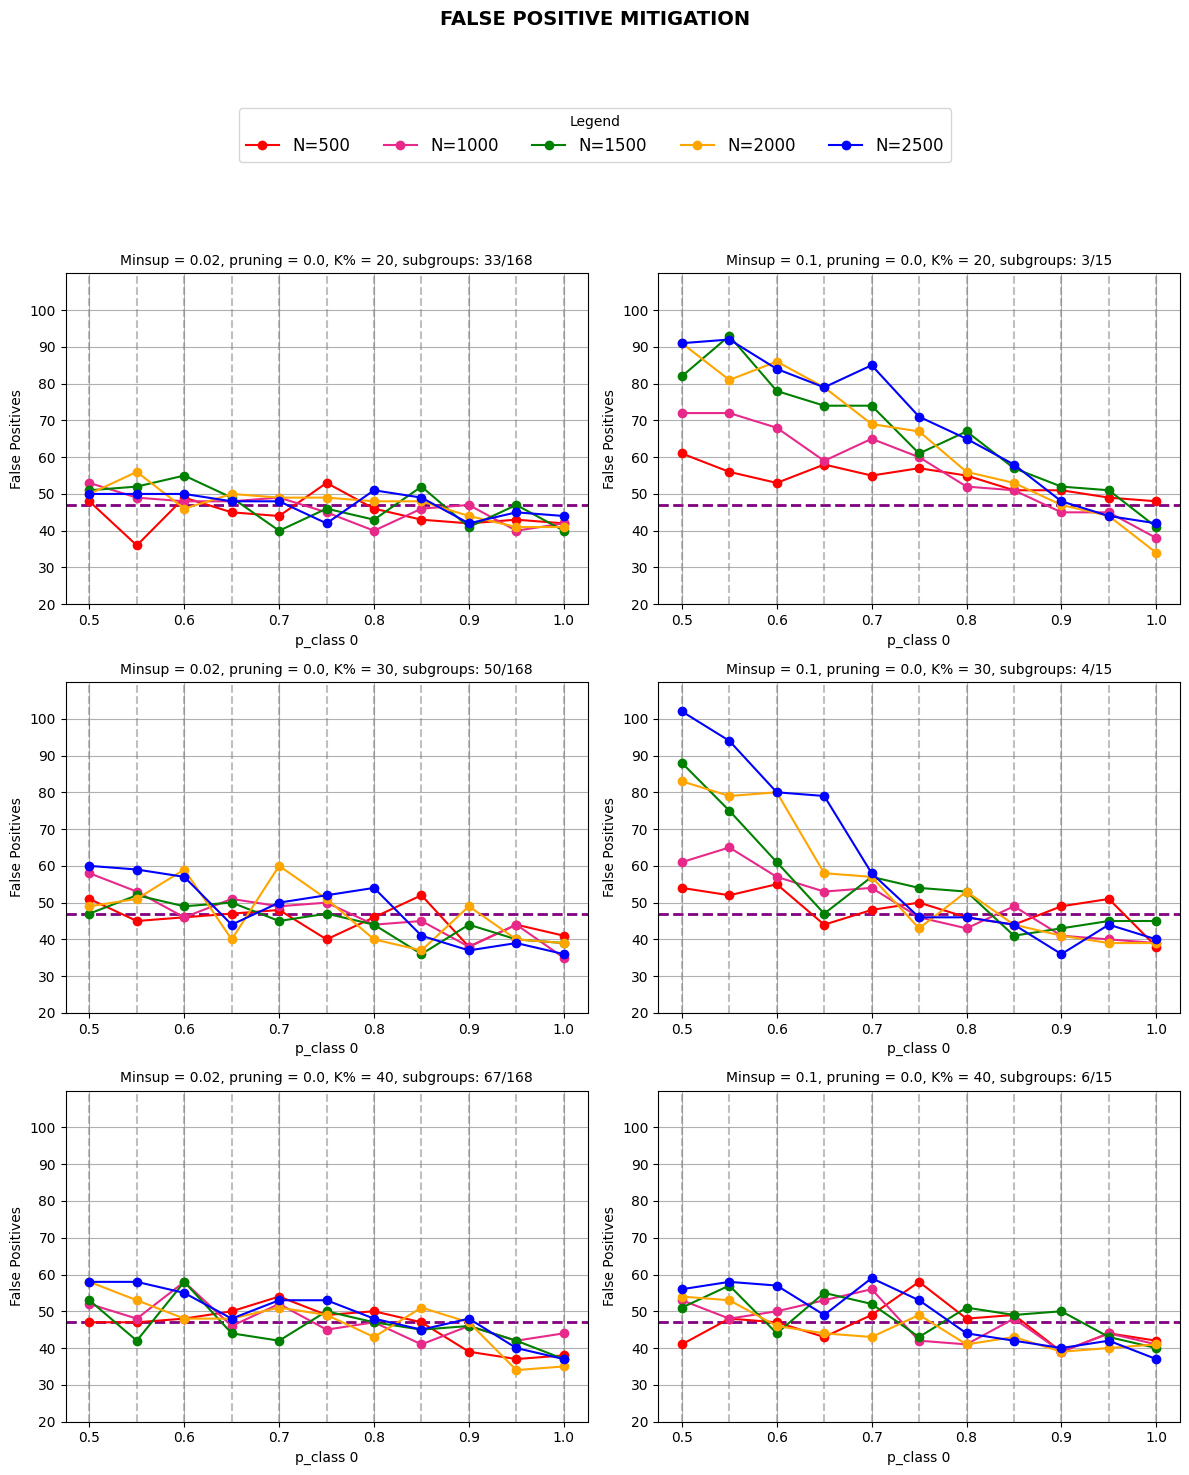

In [20]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Nome del file JSON
json_filename = "false_positives_K_compas.json"

# Caricare i dati dal file JSON
with open(json_filename, "r") as f:
    false_positives_data = json.load(f)

# Funzione per estrarre parametri
def get_params(run_key):
    params = false_positives_data.get(f"{run_key}_parameters", {})
    min_sup = params.get("min_sup", "N/A")
    percentage = params.get("percentage", "N/A")
    th_redundancy = params.get("th_redundancy", "N/A")
    L = params.get("L", "N/A")
    K = int((percentage / 100) * L) if L != "N/A" else "N/A"
    return min_sup, percentage, th_redundancy, K, L

# Lista dei valori di p da 0.5 a 1.0 con step 0.05
p_values = np.round(np.arange(0.5, 1.05, 0.05), 2)

# Definiamo i colori per ogni valore di N
colors = ["red", "#e7298a", "green", "orange", "blue", "blue"]
labels = [f"N={k*500}" for k in range(1, 6)]  # 500, 1000, 1500, 2000, 2500

# Creazione della figura con 6 subplot
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
ax = ax.flatten()

# Aggiungere titolo generale
fig.suptitle("FALSE POSITIVE MITIGATION", fontsize=14, fontweight="bold")

# Lista delle run e delle rispettive posizioni
runs = ["run1", "run4", "run2", "run6", "run3", "run6"]
positions = range(6)

# Ciclo per popolare i subplot
legend_handles = None
for pos, run in zip(positions, runs):
    selected_plot = ax[pos]
    
    # Ottenere i parametri della run corrente
    min_sup, percentage, th_redundancy, K, L = get_params(run)

    # Disegniamo la linea tratteggiata "Before Mitigation"
    before_mitigation_values = []
    for N in range(500, 3000, 500):  # da 500 a 2500
        before_mitigation_key = f"N={N}_{run}"
        if before_mitigation_key in false_positives_data:
            before_mitigation_values.append(false_positives_data[before_mitigation_key].get("Before Mitigation", None))
    
    if before_mitigation_values:
        avg_before_mitigation = np.mean([v for v in before_mitigation_values if v is not None])
        selected_plot.axhline(y=avg_before_mitigation, color="purple", linestyle="--", linewidth=2, label="Before Mitigation")

    # Aggiungere linee verticali per ogni valore di p
    for p in p_values:
        selected_plot.axvline(x=p, color="gray", linestyle="--", alpha=0.5)

    # Loop sui vari N (500, 1000, ..., 2500)
    local_legend_handles = []
    for j, N in enumerate(range(500, 3000, 500)):
        N_key = f"N={N}_{run}"
        if N_key not in false_positives_data:
            continue
        
        data = false_positives_data[N_key]
        false_positives = [data.get(f"After SMOTE N = {N} p_class 0 = {p}", None) for p in p_values]

        # Filtriamo solo i valori validi
        p_values_filtered = [p for k, p in enumerate(p_values) if false_positives[k] is not None]
        false_positives_filtered = [fp for fp in false_positives if fp is not None]
        
        if not false_positives_filtered:
            continue  # Se non ci sono dati, salta questo N
        
        # Plottiamo la linea corrispondente
        line, = selected_plot.plot(
            p_values_filtered, false_positives_filtered, 
            marker="o", linestyle="-", color=colors[j], label=labels[j]
        )
        local_legend_handles.append(line)

    if legend_handles is None:
        legend_handles = local_legend_handles

    # Impostazioni titolo del grafico con parametri della run corrente
    selected_plot.set_title(
        f"Minsup = {min_sup}, pruning = {th_redundancy}, K% = {percentage}, subgroups: {K}/{L}",
        fontsize=10
    )
    
    selected_plot.set_xlabel("p_class 0")
    selected_plot.set_ylabel("False Positives")
    selected_plot.grid()

    # Impostiamo l'intervallo dell'asse y
    selected_plot.set_ylim(20, 110)
    selected_plot.set_yticks(np.arange(20, 110, 10))
# Aggiungere la leggenda sotto il titolo generale
fig.legend(handles=legend_handles, loc="upper center", ncol=5, fontsize=12, frameon=True, title="Legend", bbox_to_anchor=(0.5, 0.92))

# Miglioriamo il layout
plt.tight_layout(rect=[0, 0, 1, 0.85])

# Mostra il grafico
plt.show()


FALSI NEGATIVI 

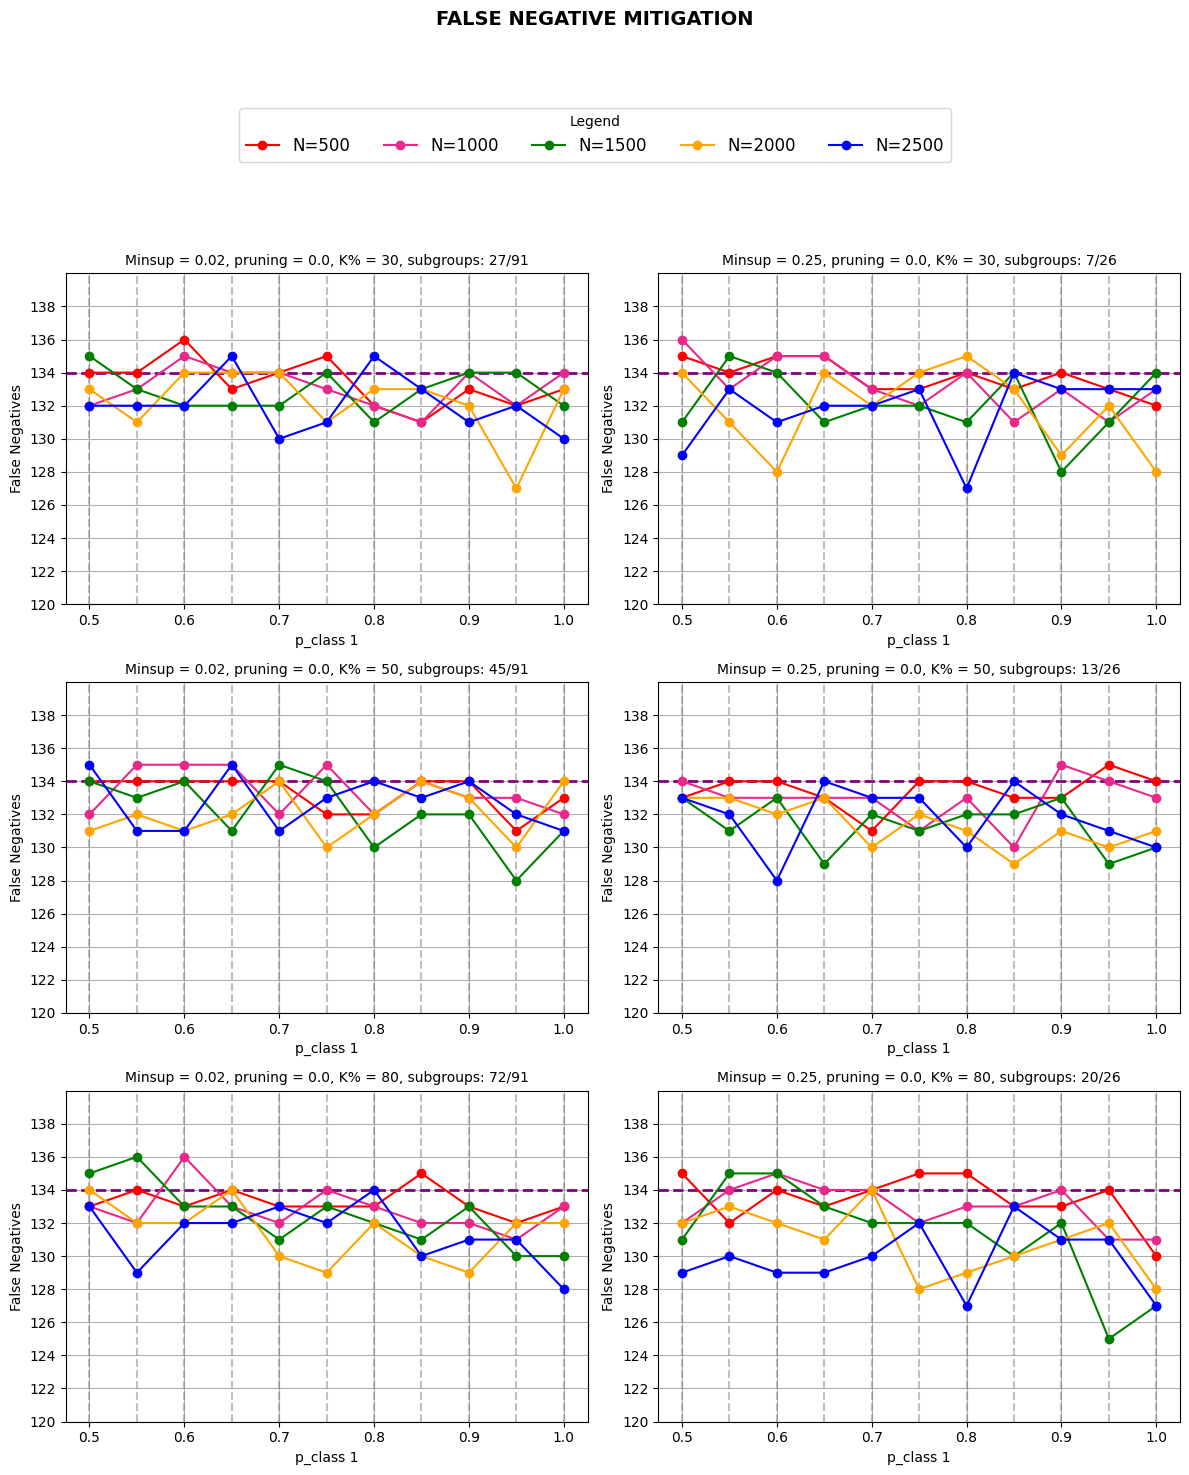

In [5]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Nome del file JSON
json_filename = "false_negatives_K_compas.json"

# Caricare i dati dal file JSON
with open(json_filename, "r") as f:
    false_negatives_data = json.load(f)

# Funzione per estrarre parametri
def get_params(run_key):
    params = false_negatives_data.get(f"{run_key}_parameters", {})
    min_sup = params.get("min_sup", "N/A")
    percentage = params.get("percentage", "N/A")
    th_redundancy = params.get("th_redundancy", "N/A")
    L = params.get("L", "N/A")
    K = int((percentage / 100) * L) if L != "N/A" else "N/A"
    
    return min_sup, percentage, th_redundancy, K, L

# Lista dei valori di p da 0.5 a 1.0 con step 0.05
p_values = np.round(np.arange(0.5, 1.05, 0.05), 2)

# Definiamo i colori per ogni valore di N
colors = ["red", "#e7298a", "green", "orange", "blue", "blue"]
labels = [f"N={k*500}" for k in range(1, 6)]  # 500, 1000, 1500, 2000, 2500

# Creazione della figura con 6 subplot
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
ax = ax.flatten()

# Aggiungere titolo generale
fig.suptitle("FALSE NEGATIVE MITIGATION", fontsize=14, fontweight="bold")

# Lista delle run e delle rispettive posizioni
runs = ["run1", "run4", "run2", "run5", "run3", "run6"]
positions = range(6)

# Ciclo per popolare i subplot
legend_handles = None
for pos, run in zip(positions, runs):
    selected_plot = ax[pos]
    
    # Ottenere i parametri della run corrente
    min_sup, percentage, th_redundancy, K, L = get_params(run)

    # Disegniamo la linea tratteggiata "Before Mitigation"
    before_mitigation_values = []
    for N in range(500, 3000, 500):  # da 500 a 2500
        before_mitigation_key = f"N={N}_{run}"
        if before_mitigation_key in false_negatives_data:
            before_mitigation_values.append(false_negatives_data[before_mitigation_key].get("Before Mitigation", None))
    
    if before_mitigation_values:
        avg_before_mitigation = np.mean([v for v in before_mitigation_values if v is not None])
        selected_plot.axhline(y=avg_before_mitigation, color="purple", linestyle="--", linewidth=2, label="Before Mitigation")

    # Aggiungere linee verticali per ogni valore di p
    for p in p_values:
        selected_plot.axvline(x=p, color="gray", linestyle="--", alpha=0.5)

    # Loop sui vari N (500, 1000, ..., 2500)
    local_legend_handles = []
    for j, N in enumerate(range(500, 3000, 500)):
        N_key = f"N={N}_{run}"
        if N_key not in false_negatives_data:
            continue
        
        data = false_negatives_data[N_key]
        false_negatives = [data.get(f"After SMOTE N = {N} p_class 1 = {p}", None) for p in p_values]

        # Filtriamo solo i valori validi
        p_values_filtered = [p for k, p in enumerate(p_values) if false_negatives[k] is not None]
        false_negatives_filtered = [fp for fp in false_negatives if fp is not None]
        
        if not false_negatives_filtered:
            continue  # Se non ci sono dati, salta questo N
        
        # Plottiamo la linea corrispondente
        line, = selected_plot.plot(
            p_values_filtered, false_negatives_filtered, 
            marker="o", linestyle="-", color=colors[j], label=labels[j]
        )
        local_legend_handles.append(line)

    if legend_handles is None:
        legend_handles = local_legend_handles

    # Impostazioni titolo del grafico con parametri della run corrente
    selected_plot.set_title(
        f"Minsup = {min_sup}, pruning = {th_redundancy}, K% = {percentage}, subgroups: {K}/{L}",
        fontsize=10
    )
    
    selected_plot.set_xlabel("p_class 1")
    selected_plot.set_ylabel("False Negatives")
    selected_plot.grid()

    # Impostiamo l'intervallo dell'asse y
    selected_plot.set_ylim(120, 140)
    selected_plot.set_yticks(np.arange(120, 140, 2))
# Aggiungere la leggenda sotto il titolo generale
fig.legend(handles=legend_handles, loc="upper center", ncol=5, fontsize=12, frameon=True, title="Legend", bbox_to_anchor=(0.5, 0.92))

# Miglioriamo il layout
plt.tight_layout(rect=[0, 0, 1, 0.85])

# Mostra il grafico
plt.show()


ERRORI

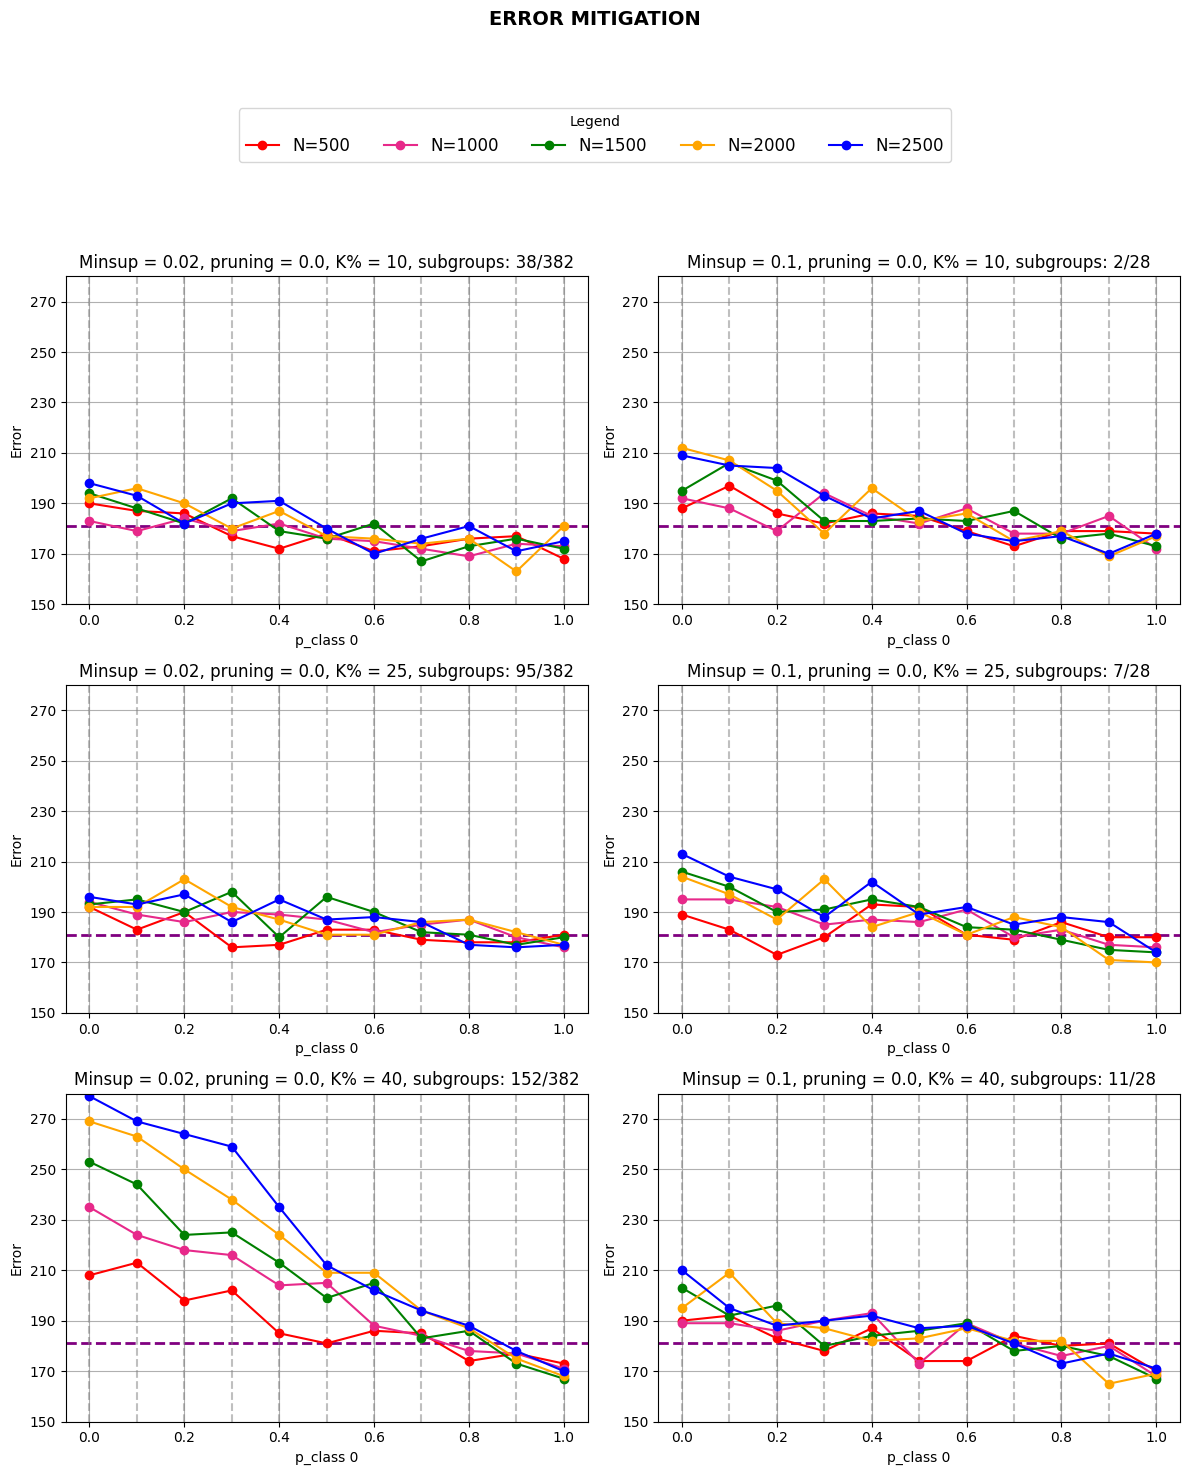

In [17]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Nome del file JSON
json_filename = "error_K_compas.json"

# Caricare i dati dal file JSON
with open(json_filename, "r") as f:
    error_data = json.load(f)

# Funzione per estrarre parametri
def get_params(run_key):
    params = error_data.get(f"{run_key}_parameters", {})
    min_sup = params.get("min_sup", "N/A")
    percentage = params.get("percentage", "N/A")
    th_redundancy = params.get("th_redundancy", "N/A")
    L = params.get("L", "N/A")
    K = int((percentage / 100) * L) if isinstance(percentage, (int, float)) and isinstance(L, int) else "N/A"
    return min_sup, percentage, th_redundancy, K, L

# Lista dei valori di p da 0.0 a 1.0 con step 0.1
p_values = np.round(np.arange(0.0, 1.05, 0.1), 2)

# Definiamo i colori per ogni N
colors = ["red", "#e7298a", "green", "orange", "blue", "blue"]
labels = [f"N={k*500}" for k in range(1, 6)]

# Creazione della figura con 6 subplot
fig, ax = plt.subplots(3, 2, figsize=(12, 15))
ax = ax.flatten()

# Aggiungere titolo generale
fig.suptitle("ERROR MITIGATION", fontsize=14, fontweight="bold")

# Lista delle run e delle rispettive posizioni
runs = ["run1", "run4", "run2", "run6", "run3", "run6"]
positions = range(6)

# Ciclo per popolare i subplot
legend_handles = None
for pos, run in zip(positions, runs):
    selected_plot = ax[pos]
    min_sup, percentage, th_redundancy, K, L = get_params(run)
    
    # Disegniamo la linea tratteggiata "Before Mitigation"
    before_mitigation_values = []
    for n in range(1, 6):
        N_key = f"N={n}K_{run}"  # Adattiamo al formato JSON
        if N_key in error_data:
            before_mitigation = error_data[N_key].get("Before Mitigation", None)
            if before_mitigation is not None:
                before_mitigation_values.append(before_mitigation)
    
    if before_mitigation_values:
        avg_before_mitigation = np.mean(before_mitigation_values)
        selected_plot.axhline(y=avg_before_mitigation, color="purple", linestyle="--", linewidth=2, label="Before Mitigation")

    # Aggiungere linee verticali per ogni valore di p
    for p in p_values:
        selected_plot.axvline(x=p, color="gray", linestyle="--", alpha=0.5)
    
    # Loop sui vari N (da 1K a 5K con step 1K)
    local_legend_handles = []
    for j, n in enumerate(range(1, 6)):
        N_key = f"N={n}K_{run}"  # Adattiamo al formato JSON
        if N_key not in error_data:
            continue
        
        data = error_data[N_key]
        error_filtered = []
        p_values_filtered = []
        
        for p in p_values:
            key = f"After SMOTE N = {n}K000 p_class 0 = {p}"  # Correzione del formato di N
            if key in data and isinstance(data[key], (int, float)):
                error_filtered.append(data[key])
                p_values_filtered.append(p)

        # Plottiamo la linea corrispondente
        if error_filtered:
            line, = selected_plot.plot(
                p_values_filtered, error_filtered, 
                marker="o", linestyle="-", color=colors[j], label=labels[j]
            )
            local_legend_handles.append(line)
    
    if legend_handles is None:
        legend_handles = local_legend_handles
    
    # Impostazioni titolo del grafico
    selected_plot.set_title(f"Minsup = {min_sup}, pruning = {th_redundancy}, K% = {percentage}, subgroups: {K}/{L}")
    selected_plot.set_xlabel("p_class 0")
    selected_plot.set_ylabel("Error")
    selected_plot.grid()
    
    # Impostiamo l'intervallo dell'asse y
    # Impostiamo l'intervallo dell'asse y
    selected_plot.set_ylim(150, 280)
    selected_plot.set_yticks(np.arange(150, 280, 20))

# Aggiungere la leggenda sotto il titolo generale
fig.legend(handles=legend_handles, loc="upper center", ncol=6, fontsize=12, frameon=True, title="Legend", bbox_to_anchor=(0.5, 0.92))

# Miglioriamo il layout
plt.tight_layout(rect=[0, 0, 1, 0.85])

# Mostra il grafico
plt.show()
